## Анализ интернет-магазина «Стримчик»

Описание проекта
интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
У нас есть данные до 2016 года. 

Мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»

## написать план иследования ?

In [1]:
import pandas as pd                 #библиотека для считывания файлов с данными
import numpy as np                  #библиотека для оругления значений?
import matplotlib.pyplot as plt     #библиотека для графиков
from scipy import stats as st       #библиотека для проверки гипотез
import seaborn as sns               #библиотека для графиков

Шаг 1. Откроeм файл с данными и изучим общую информацию

In [2]:
games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим что в некоторые данные пропущены

## Шаг 2. Подготовим данные

Приведем к нижнему регистру названия столбцов (Заменим названия столбцов)

In [4]:
games.columns = games.columns.str.lower()

Нужно поменять тип данных в колонках:
Year_of_Release - на int, тк год целое число
User_Score - на float, тк счет это дробное число

сразу не можем заменить их тк в этих данных имеются пропуски NaN
проверим где и сколько пропусков имеется

проверим пропуски в данных

In [5]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

- critic_score  user_score  rating  имеются много пропусков у игр выпуском до 2000 года , предположительно тогда не велся ичет рейтинга                       

посмотрим данные где в рейтинге есть пропуски
возможно рейтинг пропущен в старых играх

In [6]:
games.query('critic_score.isnull() & rating.isnull() & user_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


 оказывается у современных игр тоже есть пропуски в рейтинге

In [7]:
#проверим явные дубликаты
games.duplicated().sum()

0

✔ проверил неявные дубликаты ✔

проверим неявные дубликаты одновременно по имени, платформе и году релиза

In [8]:
games[['name', 'platform', 'year_of_release']].duplicated().sum()

2

выведем эти дубликаты

In [9]:
games[games[['name', 'platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


посмотрим на дубликаты игры 'Madden NFL 13' и 'NaN'

In [10]:
games.query('name == "Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


дубликаты игры Madden NFL 13 в строках с индексом 604 и 16230

In [11]:
games.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


неявный дубликат строчки 16230 удалим тк там меньше данных по количеству продаж,
тоже сделаем со строчкой 14244

In [12]:
games.drop(games.index[[16230, 14244]], inplace=True)

проверим что эти строчки удалились

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


все верно стало 16713 на 2 строчки меньше

In [14]:
print('процент пропусков в столбце year_of_release =', 
      round(games['year_of_release'].isnull().sum()/games['year_of_release'].count()*100, 2), '%')

процент пропусков в столбце year_of_release = 1.64 %


In [15]:
games[games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


удалим все строчки где есть пропуски в 'year_of_release' тк процент пропуска не очень велик.
также удалим строчки где есть пропуски в 'name', 'genre' тк всего 1 строчка и в ней нет данных по рейтингу.

In [16]:
games = games.dropna(subset=['year_of_release', 'name', 'genre'])

Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. 
Отдельно разберем это значение 

In [17]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


из общей информации доступной в интернете можно предроложить что tbd - это скорее всего пропуски такие же как Nan

чтобы поменять тип данных в рейтинге 'user_score' с object на числовое значение заменим Nan и tbd на нейтральное значение (-1) и будем иметь это ввиду.

будем иметь ввиду что не существующее значение (-1) это пропуски

'critic_score', 'user_score' заменяем на -1

In [18]:
games[['critic_score', 'user_score']] = games[['critic_score', 'user_score']].fillna(-1)

'rating' заменяем на 'NA' - нет данных

In [19]:
games['rating'] = games['rating'].fillna('NA')

удалили пропуски в столбцах 'name', 'genre' и year_of_release 

✔ удалил пропуски ✔

заменяем tbd в user_score на -1

In [20]:
games['user_score'] = games['user_score'].replace('tbd', '-1')

меняем тип данных user_score на float64,
year_of_release на int32

In [21]:
games['user_score'] = games['user_score'].astype('float64')
games['year_of_release'] = games['year_of_release'].astype('int32')

проверяем уникальные значения rating

In [22]:
games['rating'].unique()

array(['E', 'NA', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

поставили заглушку в 'rating' = NA

✔ поменял заглушку

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец sales_all

In [23]:
#games['sales_all'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [24]:
games['sales_all'] = games.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

✔ ниже добавил вывод

Снова проверяем пропуски и тип данных. 

In [25]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 50)
  print(col_l, temp[col_l].unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  sales_all        16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
--------------------------------------------------
name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no

отлично, пропусков нет и все значения приведены к нужному типу.

Вывод по предобработке данных:

- Изучили данные
- приведи к нижнему регистру названия столбцов
- проверили количество пропусков данных
- удалили неявные дубликаты
- удалили строки где есть пропуски в 'year_of_release' тк процент пропуска не очень велик и равен 1.6% .
- удалили строчки где есть пропуски в 'name', 'genre' тк всего 1 строчка и в ней нет нужных данных по рейтингу.
- заменили пропуски в 'critic_score', 'user_score' на заглушку -1
- заменили пропуски в 'rating' на 'NA' - нет данных
- привели данные к нужному типу
- заменили тип данных 'user_score' на 'float64', 'year_of_release' на 'int32'
- создали новый отдельный столбец 'sales_all' с суммарными продажами во всех регионах
- убедились что все данные в норме и пропусков после предобработке данных нет

Очень много пропусков в старых играх когда скорее всего не велся учет.
также вероятно пропуски в не популярных играх или в играх где рейтинг учитвыается на иных ресурсах.

## Шаг 3. Проведем исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли нам данные за все периоды?
Отсортируем по годам

✔ заменил сортировку

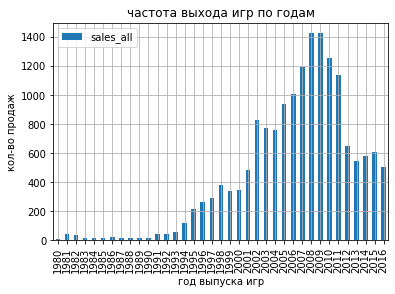

In [26]:
(
games
    .pivot_table(index='year_of_release',values='sales_all', aggfunc='count')
    .sort_values(by='year_of_release', ascending=True)
    .plot(kind='bar', grid=True, title='частота выхода игр по годам')
)
plt.xlabel("год выпуска игр")
plt.ylabel("кол-во продаж")
plt.show()

Видимо до 94-го года игр выпускалась мало. потом в 2002 стало много игр возможно изза выхода новых технологий. пик приходится на 2008-09 года. дальше после 2012 идет на спад.

получается актуальный период с 1994 года по нв.
а также с 2008 года когда был пик.
и с 2012 когда начали выпускаться новые приставки но продаж у них еще не много тк еще не успели стать популярными.

Посмотрим, как менялись продажи по платформам. 
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 
определим За какой характерный срок появляются новые и исчезают старые платформы

сохраним датафреймы с играми по периодам выпуска

In [27]:
games_1994 = games.query('year_of_release > 1994')
games_2008 = games.query('year_of_release > 2008')
games_2012 = games.query('year_of_release > 2012')

посторим график продаж игр по платформам

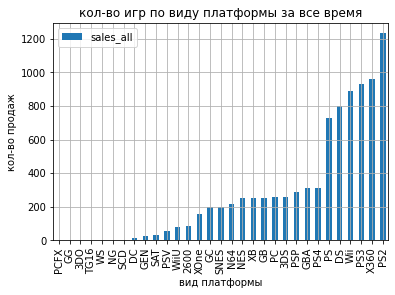

In [28]:
(
games
    .pivot_table(index='platform', values='sales_all', aggfunc='sum')
    .sort_values(by='sales_all', ascending=True)
    .plot(kind='bar', grid=True, title='кол-во игр по виду платформы за все время')
)
plt.xlabel("вид платформы")
plt.ylabel("кол-во продаж")
plt.show()

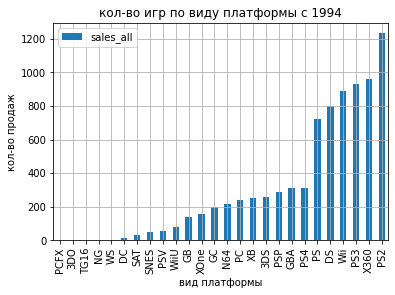

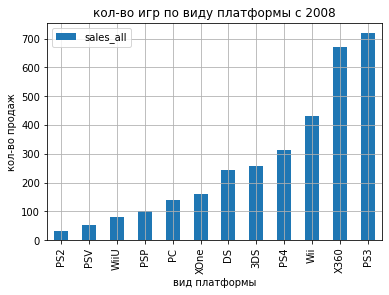

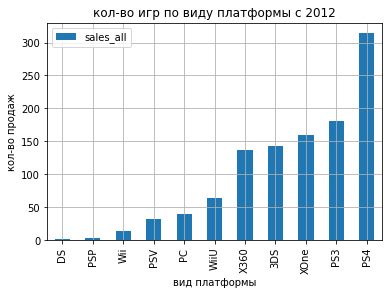

In [29]:
(games_1994
    .pivot_table(index='platform', values='sales_all', aggfunc='sum')
    .sort_values(by='sales_all', ascending=True)
    .plot(kind='bar', grid=True, title='кол-во игр по виду платформы с 1994'))
plt.xlabel("вид платформы")
plt.ylabel("кол-во продаж")
plt.show()

(games_2008
    .pivot_table(index='platform', values='sales_all', aggfunc='sum')
    .sort_values(by='sales_all', ascending=True)
    .plot(kind='bar', grid=True, title='кол-во игр по виду платформы с 2008'))
plt.xlabel("вид платформы")
plt.ylabel("кол-во продаж")
plt.show()

(games_2012
    .pivot_table(index='platform', values='sales_all', aggfunc='sum')
    .sort_values(by='sales_all', ascending=True)
    .plot(kind='bar', grid=True, title='кол-во игр по виду платформы с 2012'))

plt.xlabel("вид платформы")
plt.ylabel("кол-во продаж")
plt.show()

- видим 6 явных фоваритов первом на графике, и в самом конце какие то мало известные платформы. 
- за последние годы популярные платформы меняются , это видно на последнем графике.

In [30]:
g1 = (
games
    .pivot_table(index='platform',values='sales_all', aggfunc='sum')
    .sort_values(by='sales_all', ascending=False)
).head(6)
g1 

,sales_all
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58


6 самых популярныъ платформ за все время

In [31]:
g1.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

#тоже самое что индекс:
g1 = list(g1.index[:6])

выведем данные по количеству продаж 6 популярных платформ с 1994 года по 2016

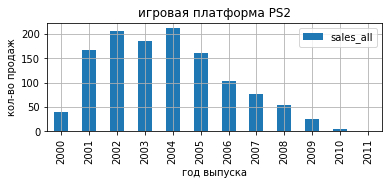

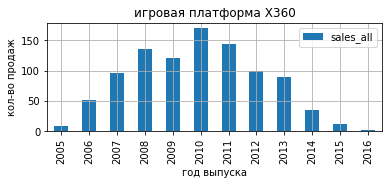

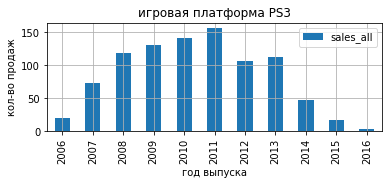

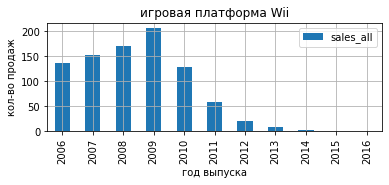

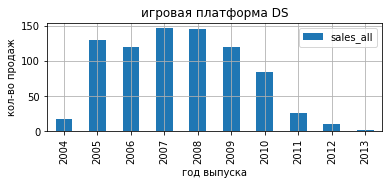

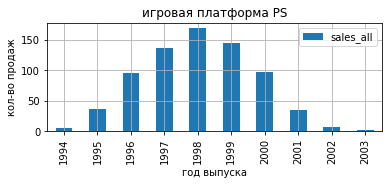

In [32]:
for platform in g1.index:
    platform_sales_all_pivot = (
        games
    .query('platform == @platform and year_of_release >= 1994')
    .pivot_table(index=['year_of_release'], values='sales_all', aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(6,2))
                                )
    plt.ylabel('кол-во продаж')
    plt.xlabel('год выпуска')
    plt.title('игровая платформа ' + platform)
    plt.show()

✔ подписал графики

получается что старые приставки еще актуальны 3-4 года после выхода новых

пик продаж игр наступает примерно через 4-6 лет после выхода приставки, после этого выпускают новую приставку и продажи на старую падают и после чего не выпускаются вовсе

✔ ниже посчитал срок жизни платформ взял код ревьюера

найдем среднее время жизни платформ 

In [33]:
# Комментарий ревьюера 0
temp = games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                           # поэтому +1
time_life['life'].median()

7.0

видим что в игры на платформы работают в среднем 7 лет

Возьмем данные за соответствующий актуальный период. 
определим Актуальный период в результате исследования предыдущих вопросов. 
Основной фактор — эти данные помогут построить прогноз на 2017 год.

актуальный период с 2012 года тк пик продаж наступает примерно через 5 лет (будет 2017) а старые платформы еще продаются 3-4 года

проверим современные платформы которых нет в предыдущем списке

In [34]:
g_2012 = (
games
    .query('year_of_release >= 2012')
    .pivot_table(index='platform',values='sales_all', aggfunc='sum')
    .sort_values(by='sales_all', ascending=False)
).head(6)
g_2012 

,sales_all
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19


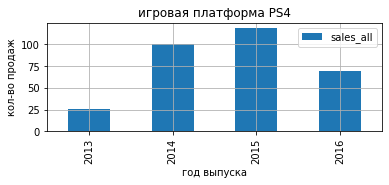

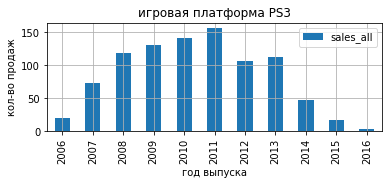

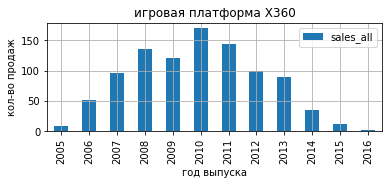

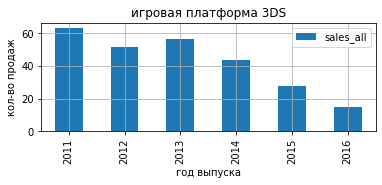

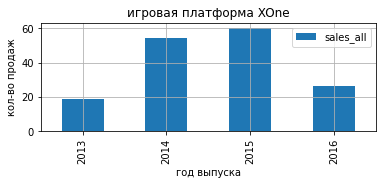

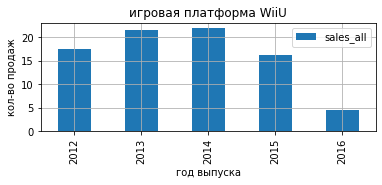

In [35]:
for platform in g_2012.index:
    platform_sales_all_pivot = (
        games
    .query('platform == @platform')
    .pivot_table(index=['year_of_release'], values='sales_all', aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(6,2)) )
    
    plt.ylabel('кол-во продаж')
    plt.xlabel('год выпуска')
    plt.title('игровая платформа ' + platform)
    plt.show()

✔ подписал графики

игры на платформы которые еще выпускаются :
- ps4 - продажи на 2017 год должны вырасти тк 5 год после выпуска обычно пик продаж.
- ps3 - продажи падают на 2016 год. скорее всего в 2017 перестанут выпускать игры
- x360 аналогично с ps3
- 3ds - продажи падают на 2016 год. скорее всего в 2017 перестанут выпускать игры. возможно готовыт выпуск новой приставки
- xone - продажи ростут на 2016 год. будут расти в 2017 году
- wiiu - продажи падают на 2016 год. похожая ситуация как у 3ds

Не Будем учитывать в работе данные за предыдущие годы.
Будем начиная с 2012 г. после того когда был пик популярности выпуска игр

In [36]:
games_2012 = games.query('year_of_release > 2012')

In [37]:
(games_2012
    .pivot_table(index='platform', values='sales_all', aggfunc = 'sum')
    .sort_values('sales_all', ascending=False)
)

,sales_all
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Топ 7 платформ c 2012 года - лидируют по продажам PS3, X360, PS4, 3DS, Wii, XOne, PC

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [38]:
#games_2012.boxplot(column = 'sales_all')
#plt.title('по глобальным продажам')
#plt.ylabel('продажи в млн $')
#plt.show()
#games_2012['sales_all'].describe()

#- средняя сумма продаж 0.5 млн
#- медиана 0.1 млн
#- очень большой разброс от среднего в 1.2 млн

In [39]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

популярные платформы за последнее время и избавимся от выбросов

In [40]:
top_platforms = games_2012[games_2012['platform'].isin(['PS4','X360','PS3','Wii','3DS', 'XOne', 'PC'])]

✔ убрал фильтрацию 

In [41]:
top_platforms['sales_all'].describe()

count    1685.000000
mean        0.586368
std         1.375730
min         0.010000
25%         0.050000
50%         0.150000
75%         0.530000
max        21.050000
Name: sales_all, dtype: float64

Выведем график ящики с усами 

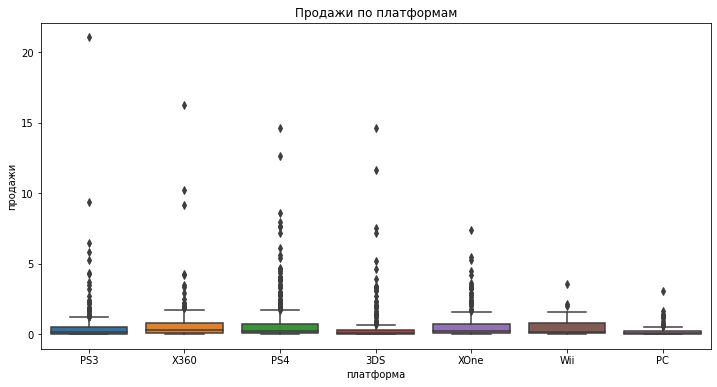

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(data=top_platforms, x='platform', y='sales_all')
plt.title('Продажи по платформам')
plt.xlabel('платформа')
plt.ylabel('продажи')
plt.show()

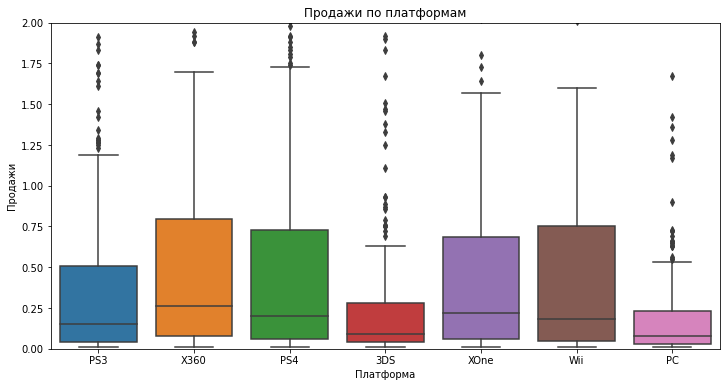

In [43]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=top_platforms, x='platform', y='sales_all')
ax.set_ylim([0, 2]) 
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

- видим что медианы проходят у всех по-разному 
- больше всего продаж игр у x360. 
- у PS4 и XOne продажи на одном уровне.
- меньше всего у и 3DS и PC.

✔ добавил пояснения к боксплоту

стабильно самые высокие продажи у Х360, немного ниже у PS4 и XOne (и они на одном уровне), однако XOne платформа новее и вероятнее нужно ориентироваться в 2017 г на выпуск игр на XOne и PS4

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

функция и построение графиков для подчета корреляции между отзывами и продажами. 

- сделаем датафрейм games_2012_userscore где user_score > 0 и год больше 2012.
- и games_2012_criticscore где critic_score > 0 и год больше 2012

In [44]:
#pik_games2 = games.query('year_of_release > 2012 and user_score > 0 and critic_score > 0')

games_2012_userscore = games_2012.query('user_score > 0')
games_2012_criticscore = games_2012.query('critic_score > 0')

In [45]:
# проверим кол-во срок в датафреймах
print(len(games_2012_userscore))
print(len(games_2012_criticscore))

1192
991


✔ заменил фильтрацию 

In [46]:
# Комментарий ревьюера
print(len(games.query('year_of_release > 2012 and user_score > 0')))
print(len(games.query('year_of_release > 2012 and critic_score > 0')))
print(len(games.query('year_of_release > 2012 and user_score > 0 and critic_score > 0')))

1192
991
976


сделаем функцию для подчета корреляции и построения графиков

✔ поменял немного функуцию после обновления фильтрации

In [47]:
def corr_to_sales(platf):
    userscore_plt = games_2012_userscore.query(f'platform == "{platf}"')
    criticscore_plt = games_2012_criticscore.query(f'platform == "{platf}"')
 
    corr_user_plt = userscore_plt['sales_all'].corr(userscore_plt['user_score'])
    corr_critic_plt = criticscore_plt['sales_all'].corr(criticscore_plt['critic_score'])
    
    userscore_plt.plot(x='user_score', 
          y='sales_all',
          style='o', grid=True, 
          figsize=(3, 3), 
          alpha=0.1)
    plt.title('Зависимость продаж игр от оценки пользователей на' + platf)

    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')

    
    criticscore_plt.plot(x='critic_score', 
          y='sales_all',
          style='o', grid=True, 
          figsize=(3, 3), 
          alpha=0.1, title='Зависимость продаж игр от оценки критиков на' + platf)
    #plt.suptitle(platf)
    
    
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
 
    return('Зависимость продаж от оценки пользователей:', platf, corr_user_plt,
           'Зависимость продаж от оценки критиков:', platf, corr_critic_plt)

старая функция до неправильной фильтрации

def corr_to_sales(platf):
    data_plt = pik_games2.query(f'platform == "{platf}"')
 
    corr_user_plt = data_plt['sales_all'].corr(data_plt['user_score'])
    corr_critic_plt = data_plt['sales_all'].corr(data_plt['critic_score'])
    
    data_plt.plot(x='user_score', 
          y='sales_all',
          style='o', grid=True, 
          figsize=(3, 3), 
          alpha=0.1)
    plt.title('Зависимость продаж игр от оценки пользователей ' + platf)

    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')

    
    data_plt.plot(x='critic_score', 
          y='sales_all',
          style='o', grid=True, 
          figsize=(3, 3), 
          alpha=0.1, title='Зависимость продаж игр от оценки критиков ' + platf)
    #plt.suptitle(platf)
    
    
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
 
    return('Зависимость продаж от оценки пользователей:', platf, corr_user_plt,
           'Зависимость продаж от оценки критиков:', platf, corr_critic_plt)

('Зависимость продаж от оценки пользователей:',
 'PS4',
 -0.031957110204556376,
 'Зависимость продаж от оценки критиков:',
 'PS4',
 0.406567902061781)

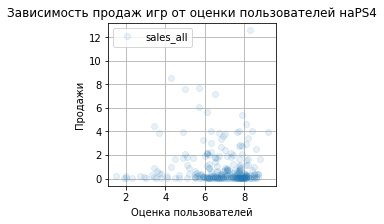

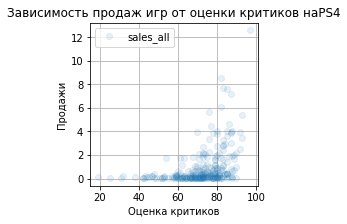

In [48]:
corr_to_sales('PS4')

('Зависимость продаж от оценки пользователей:',
 'PS3',
 0.0023944027357566925,
 'Зависимость продаж от оценки критиков:',
 'PS3',
 0.3342853393371919)

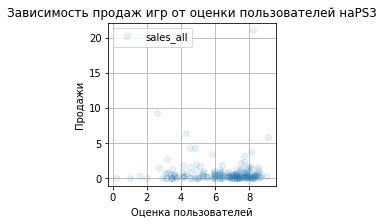

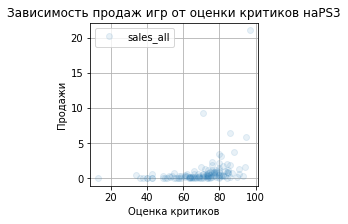

In [49]:
corr_to_sales('PS3') 

('Зависимость продаж от оценки пользователей:',
 'X360',
 -0.011742185147181342,
 'Зависимость продаж от оценки критиков:',
 'X360',
 0.3503445460228664)

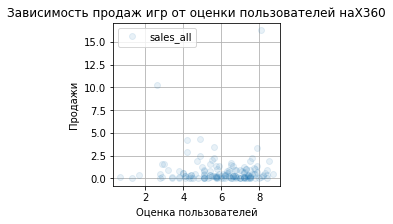

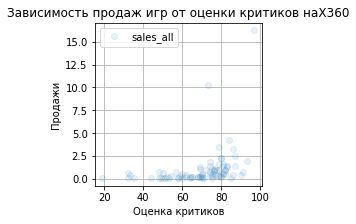

In [50]:
corr_to_sales('X360')

('Зависимость продаж от оценки пользователей:',
 'Wii',
 0.6829417215362368,
 'Зависимость продаж от оценки критиков:',
 'Wii',
 nan)

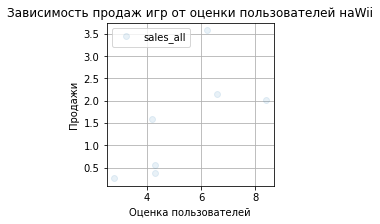

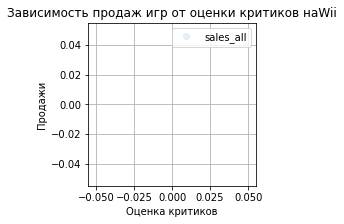

In [51]:
corr_to_sales('Wii')

('Зависимость продаж от оценки пользователей:',
 '3DS',
 0.24150411773563016,
 'Зависимость продаж от оценки критиков:',
 '3DS',
 0.35705661422881035)

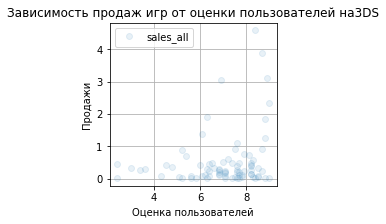

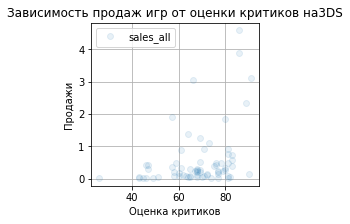

In [52]:
corr_to_sales('3DS')

('Зависимость продаж от оценки пользователей:',
 'XOne',
 -0.06892505328279412,
 'Зависимость продаж от оценки критиков:',
 'XOne',
 0.41699832800840175)

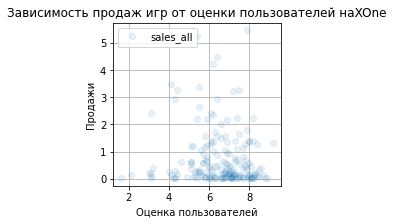

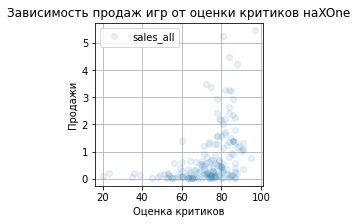

In [53]:
corr_to_sales('XOne')

('Зависимость продаж от оценки пользователей:',
 'PC',
 -0.09384186952476739,
 'Зависимость продаж от оценки критиков:',
 'PC',
 0.19603028294369382)

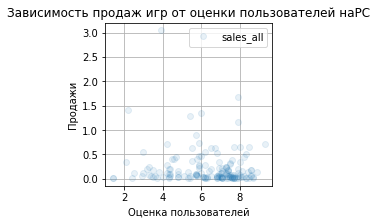

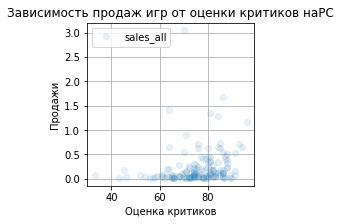

In [54]:
corr_to_sales('PC')

Есть небольшая зависимость продаж игр от оценок критиков. Чем выше оценки критиков тем выше продажи.
от оценок пользователей зависимость продаж не просматривается кроме 3DS, где просматривается связь продаж от отзывов игроков. 

Получается люди покупали игры в 2012-2016 г прислушайтесь к мнениям критиков а не других игроков. 

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

количество и сумма продаж по жанрам сохнарним в genre_sales c 2012 года

In [55]:
genre_sales = (games_2012
            .pivot_table(index='genre', values='sales_all', aggfunc=['count', 'sum', 'median'])
            )

In [56]:
genre_sales.columns = ['count_sales_all', 'sum_sales_all', 'median_sales_all']

отсортируем по сумме выручки

In [57]:
genre_sales = genre_sales.sort_values('sum_sales_all', ascending=False)
genre_sales

,count_sales_all,sum_sales_all,median_sales_all
genre,,,
Action,766,321.87,0.110
Shooter,187,232.98,0.450
Sports,214,150.65,0.240
Role-Playing,292,145.89,0.125
Misc,155,62.82,0.100
Platform,74,42.63,0.225
Racing,85,39.89,0.120
Fighting,80,35.31,0.125
Adventure,245,23.64,0.030


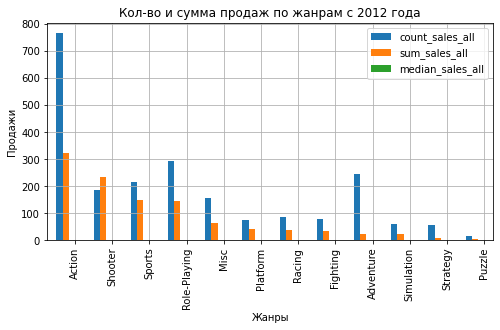

In [58]:
genre_sales.plot(kind='bar', figsize=(8,4), position=1, grid=True)
plt.title('Кол-во и сумма продаж по жанрам с 2012 года')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

отсортируем по медиане

In [59]:
genre_sales.sort_values('median_sales_all', ascending=False)

,count_sales_all,sum_sales_all,median_sales_all
genre,,,
Shooter,187,232.98,0.450
Sports,214,150.65,0.240
Platform,74,42.63,0.225
Role-Playing,292,145.89,0.125
Fighting,80,35.31,0.125
Racing,85,39.89,0.120
Action,766,321.87,0.110
Simulation,62,21.76,0.100
Misc,155,62.82,0.100


построим боксплот чтобы понять какие жанры стабильно принося больше прибыли

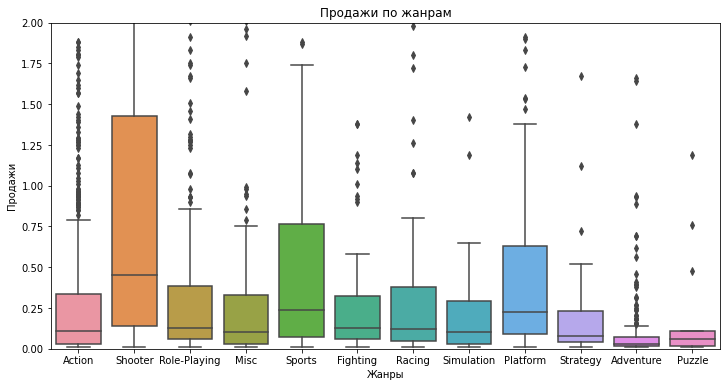

In [60]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=games_2012, x='genre', y='sales_all')
ax.set_ylim([0, 2]) 
plt.title('Продажи по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

Больше всего прибыли приносят игры жанра Action и Shooter, меньше всего Puzzle и Strategy.

но стабильно больше всего приносят Shooter на втором месте sports и на третьем Platform а меньше всего Adventure

выше добавил медиану и иллюстрации и новые пояснения к выводу

Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишем различия в долях продаж.
Самые популярные жанры (топ-5).
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишим различия в долях продаж.

Сохраним датаFrame где в регионах продажи не = 0

In [61]:
games_na = games_2012.query('na_sales > 0')
games_eu = games_2012.query('eu_sales > 0')
games_jp = games_2012.query('jp_sales > 0')

заменил на актуальный датафрейм games_2012

найдем топ5 платформ по регионам за все время

In [62]:
na_pivot_p = (games_na.pivot_table(index='platform', values='na_sales',
                                aggfunc='sum').sort_values('na_sales', ascending=False)
             )

na_pivot_p.head()

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [63]:
eu_pivot_p = (games_na
              .pivot_table(index='platform', values='eu_sales',
                                aggfunc='sum').sort_values('eu_sales', ascending=False)
             )
eu_pivot_p.head()

,eu_sales
platform,
PS4,138.66
PS3,67.04
XOne,51.28
X360,42.25
3DS,29.29


In [64]:
jp_pivot_p = (games_2012
              .groupby('platform').agg({'jp_sales':'sum'})
              .sort_values('jp_sales', ascending=False)
             )
jp_pivot_p.head()

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


создаем функцию чтобы добвыить категорию другие платформы

In [65]:
def p_f(data, col):
    
    df = data.reset_index()
    
    df.columns = [col, 'sales']
    
    df1 = df[:5]
    df2 = df[5:]

    df2 = pd.DataFrame(data = {
        col : ['others'],
        'sales' : [df['sales'][5:].sum()]})

    df = pd.concat([df1, df2])

    return df

создаем функцию чтобы нарисовать графики продаж по платформам в разных регионах

In [66]:
def draw_pie(data, col, title, ax):
    
    plot = (data.groupby(col).sum()['sales']
        .plot(kind='pie', grid=True, autopct='%1.1f%%', ax = axes[ax], title=title, ylabel='продажи'))
    


нарисуем графики продаж по платформам в разных регионах

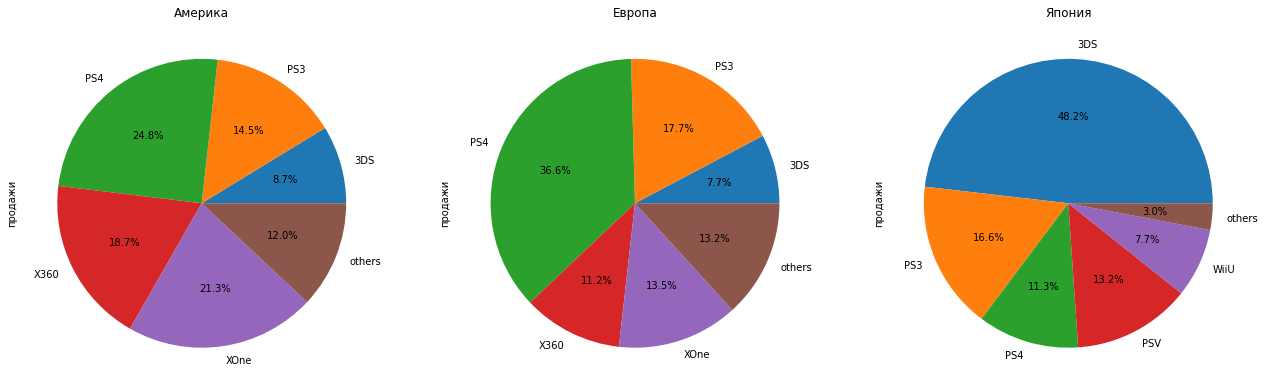

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

draw_pie(p_f(na_pivot_p, 'platform'), 'platform', 'Америка', 0)
draw_pie(p_f(eu_pivot_p, 'platform'), 'platform', 'Европа', 1)
draw_pie(p_f(jp_pivot_p, 'platform'),'platform','Япония', 2)


- самые полулярные платформы в Америке PS4, XOne, X360, PS3, 3DS
- самые полулярные платформы в Eвропе  PS4, PS3, XOne, X360, 3DS
- самые полулярные платформы в Японии  3DS, PS3, PSV, PS4, WiiU
- суммы продаж указаны в таблцах выше

в Америке и Европе самая популярная PS4 на втором месте XOne.

в америке и европе рейтинг платформ похож а вот в японии чаще используют другие приставки

Самые популярные жанры (топ-5). 

In [68]:
na_pivot_g = games_na.pivot_table(index='genre', values='na_sales',
                                aggfunc='sum').sort_values('na_sales', ascending=False)

eu_pivot_g = games_eu.pivot_table(index='genre', values='eu_sales',
                                aggfunc='sum').sort_values('eu_sales', ascending=False)

jp_pivot_g = games_jp.pivot_table(index='genre', values='jp_sales',
                                aggfunc='sum').sort_values('jp_sales', ascending=False)

print(na_pivot_g.head())
print()
print(eu_pivot_g.head())
print()
print(jp_pivot_g.head())

              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49

              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19

              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61


нарисуем графики продаж по жанрам в разных регионах

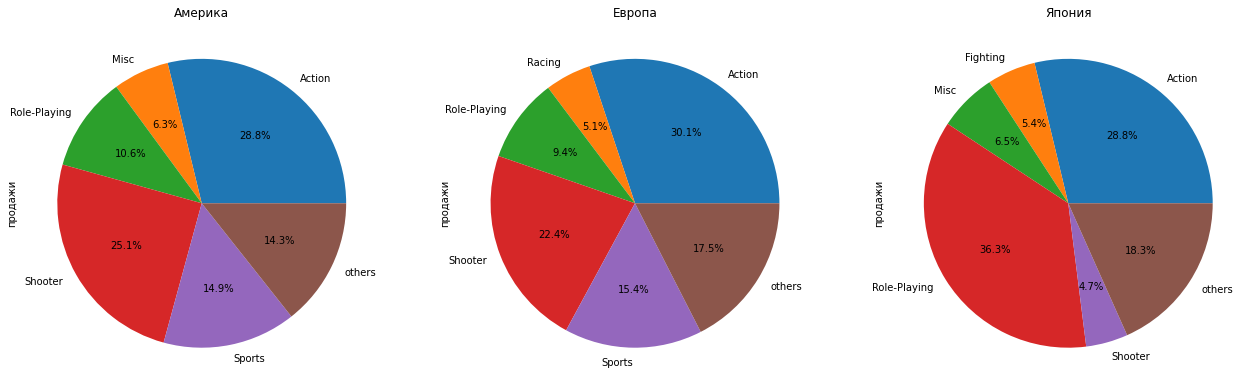

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

draw_pie(p_f(na_pivot_g, 'genre'), 'genre', 'Америка', 0)
draw_pie(p_f(eu_pivot_g, 'genre'), 'genre', 'Европа', 1)
draw_pie(p_f(jp_pivot_g, 'genre'),'genre','Япония', 2)

рейтинг по жанрам в америке и европе очень похож всем нравятся экшен спорт шутеры тк это очень динамичные игры. отличаются только гонки похоже в европе они более популярны.

В японии первом месте ролевые игры с большим отрывом. Далее экшн и спорт. видно что в японии другие интересы. 

Также в каждом рейтинге есть Жанр музыка.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

сделаем функцию для пояснения рейтинга

In [70]:
def rating_f(row):

    rating = row['rating']

    if rating == 'E':
        return 'Для всех'

    if rating == 'M':
        return '> 17 лет'
    
    if rating == 'T':
        return '13-19 лет'
    
    if rating == 'E10+':
        return '>10 лет'
    
    if rating == 'K-A':
        return 'Для всех'

    return 'другой'

games_2012['ESRB'] = games_2012.apply(rating_f, axis=1)

/tmp/ipykernel_683/3967132525.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_2012['ESRB'] = games_2012.apply(rating_f, axis=1)


In [71]:
games_2012.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all,ESRB
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,> 17 лет
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,> 17 лет
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NA,14.63,другой
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,NA,14.60,другой
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,> 17 лет


сделаем функцию для построения сводных таблиц графиков рейтинга

In [72]:
def top_rating (groupby, region_sales, title, ax):
    
    pivot_sales = (games_2012
        .groupby(groupby)
        .agg({region_sales: 'sum'})
        .sort_values(by=region_sales, ascending=False)[:6])
    
    plot = pivot_sales.plot(kind='bar', grid=True,
                            title=title, ax=axes[ax], ylabel = 'Продажи', xlabel = 'Рейтинг')

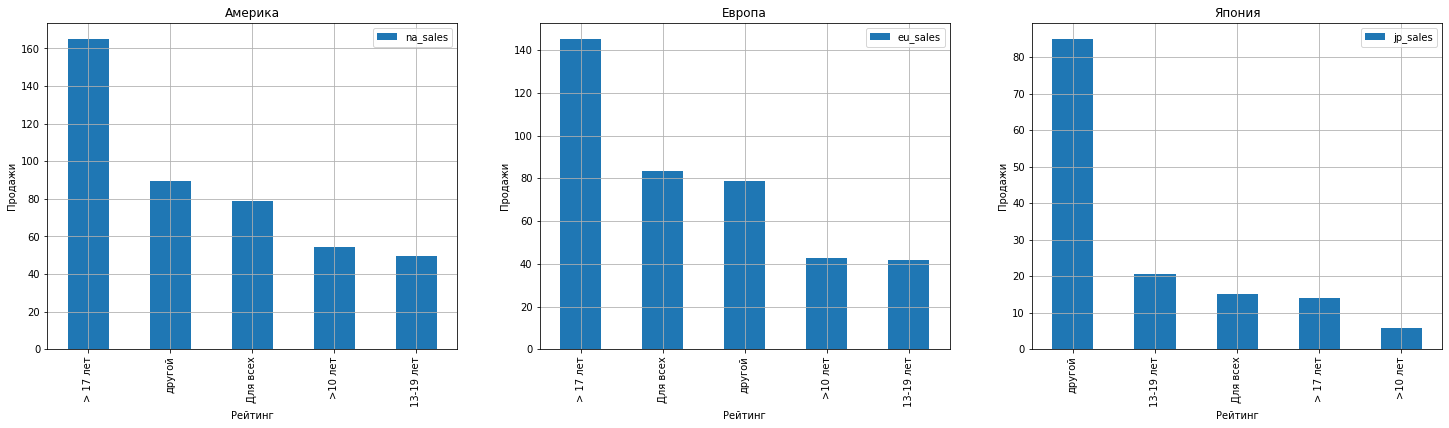

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_rating('ESRB', 'na_sales', 'Америка', 0)
top_rating('ESRB', 'eu_sales', 'Европа', 1)
top_rating('ESRB', 'jp_sales', 'Япония', 2)


в америке и европе большенство продаж от игр с рейтингом 'больше 17 лет' и 'для всех', меньше всего "13-19 лет". 

по японии большенство продаж от игр по которым нет информации на втором месте 'для всех' и на третьем "13-19 лет".

В японии используют свой рейтинг

## Шаг 5. Проверка гипотез

1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

In [74]:
games_2012['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

сделаем датафрейм с платформой XOne и PC где рейтинг >0, тк 0 считаем пропусками

In [75]:
games_XOne = games_2012.query('platform == "XOne" and user_score > 0')
games_PC = games_2012.query('platform == "PC" and user_score > 0')

построим графики по этим данным

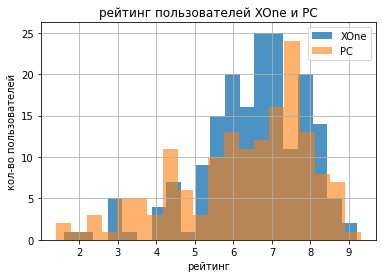

рейтинг пользователей XOne count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

рейтинг пользователей PC count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64


In [76]:
games_XOne['user_score'].plot(
    kind='hist', 
    bins=20, 
    #histtype='step',
    linewidth=5,
    alpha=0.8, 
    label='XOne',
    legend=True,)

games_PC['user_score'].plot(
    kind='hist', 
    bins=20,
    #histtype='step',
    linewidth=5,
    alpha=0.6,
    label='PC',
    legend=True,
    grid=True)

plt.xlabel("рейтинг")
plt.ylabel("кол-во пользователей")
plt.title('рейтинг пользователей XOne и PC')
plt.show()

print('рейтинг пользователей XOne', games_XOne['user_score'].describe())
print()
print('рейтинг пользователей PC', games_PC['user_score'].describe())

Средней пользовательский рейтинг XOne = 6.5, медиана = 6.8, разброс значений 1.3 от среднего
Средней пользовательский рейтинг PC = 6.2, медиана = 6.8, разброс значений 1.7 от среднего

исходя из графика и вывода данных сформулируем нулевую и альтернативную гипотезы

Нулевая гипотеза: средние значения рейтинга пользователей Xbox One и PC равны.
Альтернативная гипотеза: средние значение рейтинга пользователей Xbox One больше средние значение рейтинга пользователей PC.

Проведем одностороний т-тест

In [77]:
alpha = 0.05

results = st.ttest_ind(games_XOne['user_score'], games_PC['user_score'],alternative='greater', equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.07379797006715232
Не получилось отвергнуть нулевую гипотезу


не можем отвергнуть нулевую гипотезу значит есть вероятность что средние пользовательските рейтинги не различаются у PC и XOne

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [78]:
games_Action = games_2012.query('genre == "Action" and user_score > 0')
games_Sports = games_2012.query('genre == "Sports" and user_score > 0')

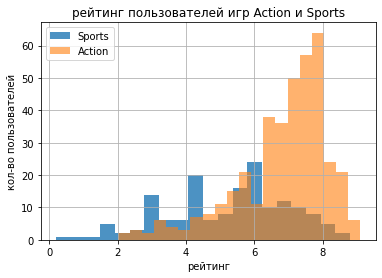

рейтинг пользователей игр Action count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

рейтинг пользователей игр Sports count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64


In [79]:
games_Sports['user_score'].plot(
    kind='hist', 
    bins=20, 
    #histtype='step',
    linewidth=5,
    alpha=0.8, 
    label='Sports',
    legend=True,)

games_Action['user_score'].plot(
    kind='hist', 
    bins=20,
    #histtype='step',
    linewidth=5,
    alpha=0.6,
    label='Action',
    legend=True,
    grid=True)

plt.xlabel("рейтинг")
plt.ylabel("кол-во пользователей")
plt.title('рейтинг пользователей игр Action и Sports')
plt.show()

print('рейтинг пользователей игр Action', games_Action['user_score'].describe())
print()
print('рейтинг пользователей игр Sports', games_Sports['user_score'].describe())

Использовал Т-критерий для проверки разницы средних значений выборок
можем использовать Т-тест тк генеральные совокупности не зависят друг от друга и выборки достаточно большие

выборки у нас разного размера, поэтому указываем параметр equal_var= False

Средний пользовательский рейтинг жанров Action = 6.8, медиана = 7.1, разброс значений 1.3 от среднего
Средний пользовательский рейтинг жанров Sports = 5.2, медиана = 5.5, разброс значений 1.8 от среднего

исходя из графика и вывода данных сформулируем нулевую и альтернативную гипотезы

Нулевая гипотеза: средние значения пользовательского рейтинга жанров Action и Sports равны.
Альтернативная гипотеза: средние значение рейтинга пользователей Xbox One и PC разные.

In [80]:
alpha = 0.01

results = st.ttest_ind(games_Action['user_score'], games_Sports['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, значит средние значения пользовательского рейтинга жанров Action и Sports разные.

Для проверки разницы средних нулевые гипотезы формулируются так: средние значения совокупностей равны

альтернативные гипотезы сформулировал исходя из данных и графиков


## Шаг 6. общий вывод:

Проанализировав игнтернет мазазин Стримчик 
мы подготовили данные для анализа 
провели предабработку данных
выявили что в данных есть много пропусков
выявили что существует много пропусков в играх которые выходили в начале производства до 1993 года


Выяснили что до 94-го года выпускалось и продавалось мало. 
с 1994 года начался рост продаж
в 2002 видим резкий скачок продаж который связан позможно с выходом новых технологий и новых приставок.
Пик продаж приходится на 2008-09 года после которого идет спад
в 2011 проимходит резкий спад (вероятно изза выхода новых мобильных устройств)

в связи с этим актуальным периодом для анализа является с 2012 года по нв

выяснили что в среднем игры для платформ выпускаются в течении 7 лет после чего прекращают
пик продаж приходится в среднем на 4-5 лет
после пика продаж обычно выходят новые пристаки а страрые продолжают еще поддерживаться еще в среднем 3-4 года


в анализе мы выяснили какие приставки были на пике попкляоности в разнве промежутки времени

провели анализ для современных приставок выяснили что:

PS3, X360, PS4, 3DS, WiiU, XOne и PC

игры на платформы которые еще выпускаются :
ps4 - продажи на 2017 год должны вырости тк 5 год после выпуска обычно пик продаж.
ps3 - продажи падают на 2016 год. скорее всего в 2017 перестанут выпускать игры
x360 аналогично с ps3
3ds - продажи падают на 2016 год. скорее всего в 2017 перестанут выпускать игры. возможно готовыт выпуск новой приставки
xone - продажи ростут на 2016 год. будут расти в 2017 году
wiiu - продажи падают на 2016 год. похожая ситуация как у 3ds

посчитали среднее и медиану значение выручки для каждой приставки начиная с 2012 года
а также визуализировали данные

выявили что лучше на 2017 год будут продаваться игры на Xone и PS4

выяснили что на продажи игр влияют отзывы профессиональных критиков больше чем отзывы пользователей
построили графики и посчитали данные Зависимость продаж от оценки пользователей и критиков

вывrлеи общее распределение игр по жанрам. 
выяснили что самые популярные жанры это Action и Sports 

распределили самые популярные платформы и жанры в разных регионах

Стабильнее всего приносят прибыль Shooter, sports и Platform значит в 2017 году выгоднее всего будет продавать именно их

- самые полулярные игры на платформы в Америке PS4, XOne, X360, PS3, 3DS
- самые полулярные игры на платформы в Eвропе  PS4, PS3, XOne, X360, 3DS
- самые полулярные игры на платформы в Японии  3DS, PS3, PSV, PS4, WiiU
- суммы продаж и графики указаны выше

выявили как влияет рейтинг ESRB на продажи в отдельных регионах

Проверили гипотезы

Есть вероятность что средние пользовательските рейтинги не различаются у PC и XOne

Есть вероятность средние значения пользовательского рейтинга жанров Action и Sports разные.